## 1. Introduce 

In this project, we will design and implement a deep learning model that learns to recognize sequences of digits. We will train the model using synthetic data generated by concatenating character images from MNIST.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

### 1.1  Import Data 

In [3]:
# Load the dataset
train = pd.read_csv("./Input/train.csv")
test = pd.read_csv("./Input/test.csv")

import matplotlib.pyplot as plt
%matplotlib inline

# Display the first record
display(train.head(n=1))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2 Check Data

In [4]:
column_target = [x for x in train.columns if x not in test.columns]
labels = train[column_target]

In [5]:
column_target

['label']

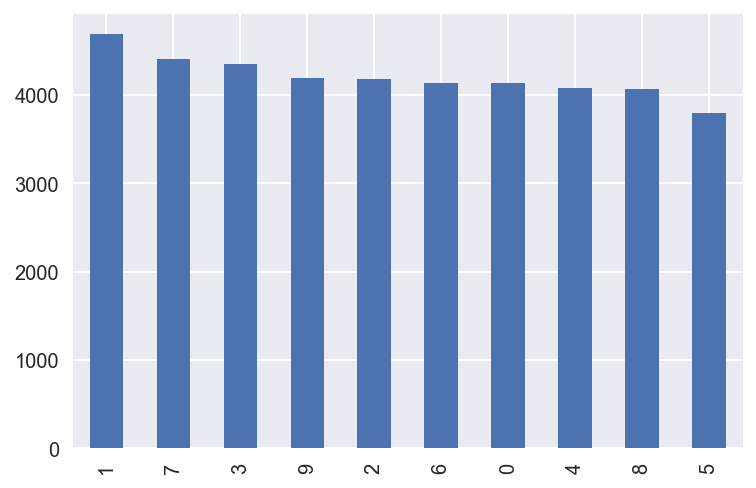

In [6]:
#Distribution of the digits in the dataset
labels.iloc[:,0].value_counts().plot(kind='bar')
plt.show()

In [7]:
# One hot encoding for labels
ohe = OneHotEncoder()
ohe.fit(labels)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([10]), array([ 0, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [8]:
# Save one hot encoded label data at y_train
y_train = ohe.transform(labels).toarray()

In [9]:
# Remove target data from train set (labels)
X_train = train.drop(column_target, axis=1)

In [10]:
print("X_train shape: {}. Test shape: {}. Target shape {}".format(X_train.shape, test.shape, labels.shape))
X_train.head()

X_train shape: (42000, 784). Test shape: (28000, 784). Target shape (42000, 1)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Analyse the pixels intensity values
subset_pixels = X_train.iloc[:, :]
subset_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
image_size = X_train.shape[1]
print("Number of pixels for each image: {}".format(image_size))
print("Pixels ranges from {} to {}".format(X_train.values.min(), X_train.values.max()))

image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.int)
print("Image size: {}x{}".format(image_width, image_height))

Number of pixels for each image: 784
Pixels ranges from 0 to 255
Image size: 28x28


It is a [0]


/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


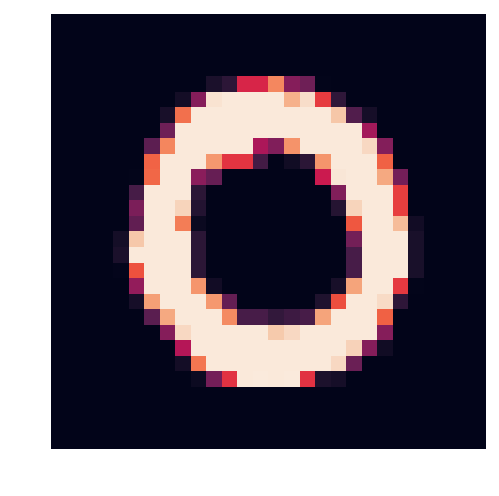

In [13]:
# check index 1's image
index = 1    
image = X_train.ix[index, :].values
label = labels.values[index]
    
plt.axis('off')
plt.imshow(image.reshape(image_width, image_height),)
print("It is a {}".format(label))

### 2 Model

In [36]:
X_train.shape

(42000, 28, 28, 1)

In [37]:
X_train0=np.array(X_train)
test0=np.array(test)

In [38]:
X_train1=X_train0.reshape(42000,28,28)
X_test1=test0.reshape(28000,28,28)

In [39]:
X_train = X_train1[:, :, :, np.newaxis]
X_test = X_test1[:, :, :, np.newaxis]

In [40]:
X_train.shape

(42000, 28, 28, 1)

In [41]:
y_train.shape

(42000, 10)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

Using TensorFlow backend.


In [43]:
np.random.seed(0)

model1 = Sequential()
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='Same',kernel_initializer="glorot_uniform"))
model1.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model1.add(Conv2D(4, (5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [44]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 4)         404       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 4)           404       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 4)           404       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 4)           0         
__________

In [45]:
y_train.shape,X_train.shape

((42000, 10), (42000, 28, 28, 1))

In [46]:
%%time
hist1 = model1.fit(X_train, y_train, epochs=5, batch_size=600, verbose=2)

Epoch 1/5
 - 15s - loss: 3.9777 - acc: 0.1140
Epoch 2/5
 - 16s - loss: 2.2794 - acc: 0.1252
Epoch 3/5
 - 16s - loss: 2.2007 - acc: 0.1623
Epoch 4/5
 - 17s - loss: 2.1599 - acc: 0.1735
Epoch 5/5
 - 16s - loss: 2.1378 - acc: 0.1776
CPU times: user 5min 15s, sys: 1min 42s, total: 6min 57s
Wall time: 1min 20s


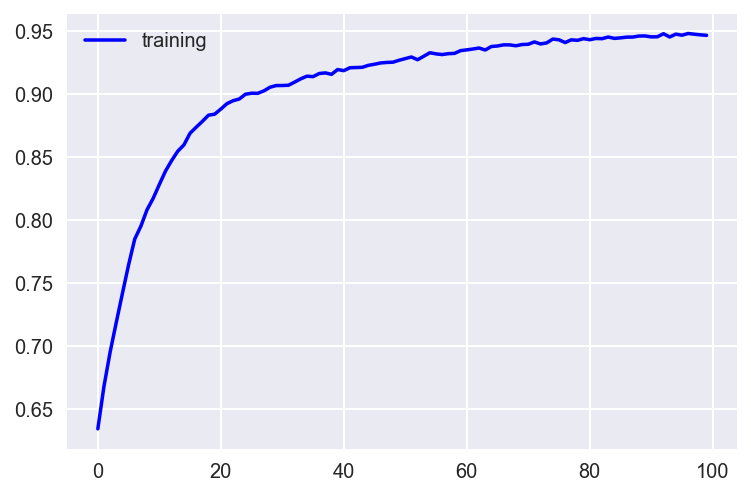

In [70]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.legend()
plt.show()

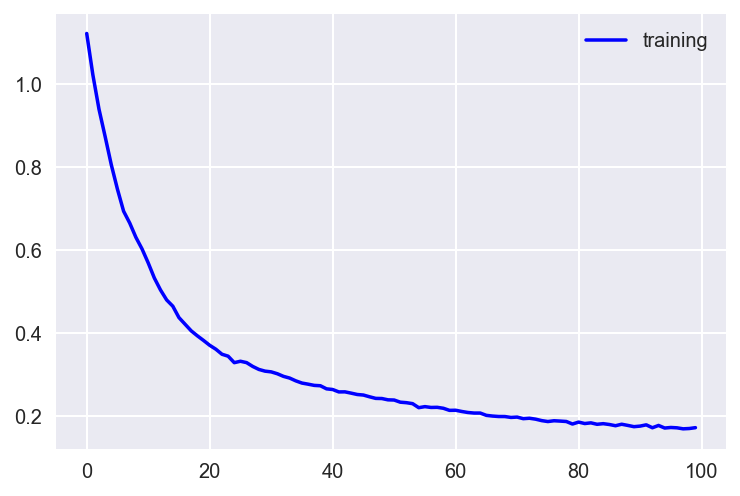

In [71]:
plt.plot(hist1.history['loss'], 'b-', label="training")
plt.legend()
plt.show()

In [72]:
pred = model1.predict(X_test)

In [73]:
pred1=model1.predict_classes(X_test)

28000/28000 [==============================] - 2s 80us/step


In [74]:
pred1

array([2, 0, 9, ..., 3, 9, 2])

In [75]:
pred1.shape

(28000,)

In [76]:
submission = pd.read_csv("./Submit/sample_submission.csv")
submission

submission["Label"] = pred1


print(submission.shape)
submission.head()

(28000, 2)


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [77]:
# Export csv file
submission.to_csv("../Digit_Recognizer_by_Deep_Learning/Submit/submission_karas.csv", index=False)